In [2]:
import pickle
x_dev, y_dev = None, None
with open('train.pickle', 'rb') as file:
    x_dev, y_dev = pickle.load(file)

X_test, Y_test = None, None
with open('test.pickle', 'rb') as file:
    X_test, Y_test = pickle.load(file)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_curve, roc_auc_score

In [4]:
import numpy as np

X_train, X_val, Y_train, Y_val = train_test_split(x_dev,y_dev, test_size=0.2, random_state=0)

label = {'Fully Paid' : 0, 'Charged Off' : 1}


Y_train = Y_train.apply(lambda x: label[x]).values
Y_test = Y_test.apply(lambda x: label[x]).values
Y_val = Y_val.apply(lambda x : label[x]).values

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test


Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Define Naive Bayes model
nb = GaussianNB()

# Define grid search parameters
params = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

# Perform grid search to find best parameters
grid_search = GridSearchCV(nb, param_grid=params, cv=5)
grid_search.fit(X_train, Y_train)

# Print best parameters and score
print('Best parameters:', grid_search.best_params_)

# Fit model on training set with best parameters
best_nb = grid_search.best_estimator_
best_nb.fit(X_train, Y_train)

# Predict on testing set
y_pred = best_nb.predict(X_test)



Best parameters: {'var_smoothing': 1e-05}


Confusion matrix

In [9]:
# Predict on testing set
y_pred = best_nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8027422164987501


<Axes: >

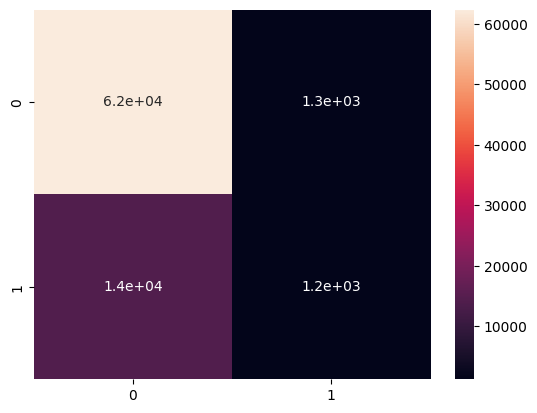

In [10]:
import seaborn as sns
cf_matrix=confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)


ROC Curve

ROC AUC score: 0.6860023897714345


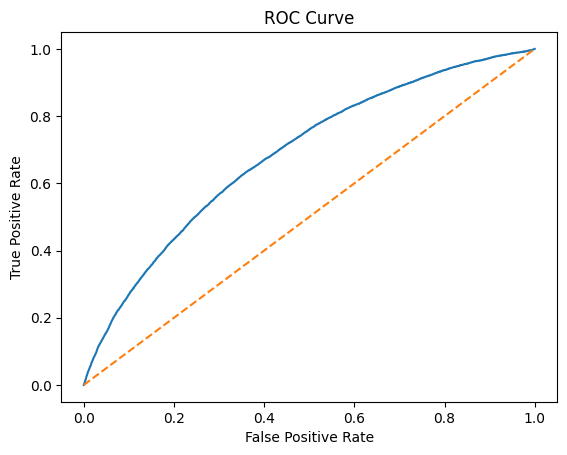

In [11]:
# calculate ROC curve and AUC score
y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC score:", roc_auc)

# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Naive Bayes is a probabilistic model that makes strong independence assumptions between the features. In other words, it assumes that the features are conditionally independent given the class label. Because of this assumption, Naive Bayes is often less sensitive to imbalanced data than other machine learning models.